# Enunciado Parte 2

Histogramas y ecualización de histogramas

1. Para las imágenes `img1_tp.png` y `img2_tp.png` leerlas con OpenCV en escala de grisas y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, ¿considera que puede ser de utilidad tomar como 'features' a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/EIA-UBA/Bimestre3/VC1/TP1/Parte2

/content/drive/MyDrive/EIA-UBA/Bimestre3/VC1/TP1/Parte2


In [3]:
!ls

img1_tp.png  img2_tp.png  segmentacion.png  TP1_Parte2.ipynb


In [4]:
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
# Herramienta para navegar en el contenido de carpetas
import os

# **Item 1**

Tamaño imagen 1: (288, 287) - Tamaño imagen 2: (288, 287)


Text(0.5, 1.0, 'Imagen 2')

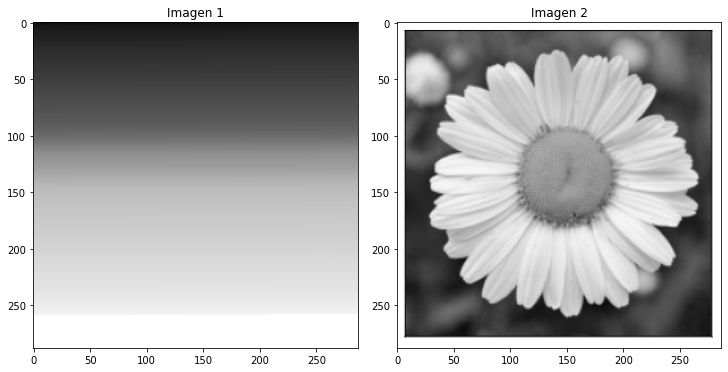

In [5]:
# Cargar una imagen en modo monocromático (un canal)
img1 = cv.imread('img1_tp.png',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png',cv.IMREAD_GRAYSCALE)

# Como lucen los datos en un np.array
print('Tamaño imagen 1:', img1.shape, '- Tamaño imagen 2:', img2.shape)

# Muestro la imagen con matplotlib
# Muestro imagenes
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(10,15))
axs[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Imagen 1')
axs[1].imshow(img2, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Imagen 2')

In [6]:
# Funcion para ploteo de histogramas en escala de grises variando el numero de bins
def ploteo_histogramas_GS(img1, img2, bins):
  fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(15,5))
  hist1, bins1 = np.histogram(img1.ravel(), bins, [0, 256])
  hist2, bins2 = np.histogram(img2.ravel(), bins, [0, 256])
  title = "Número de bins: " + str(bins)
  st = fig.suptitle(title, fontsize="x-large")
  axs[0].plot(hist1)
  axs[0].set_title('Histograma imagen 1')
  axs[1].plot(hist2)
  axs[1].set_title('Histograma imagen 2')

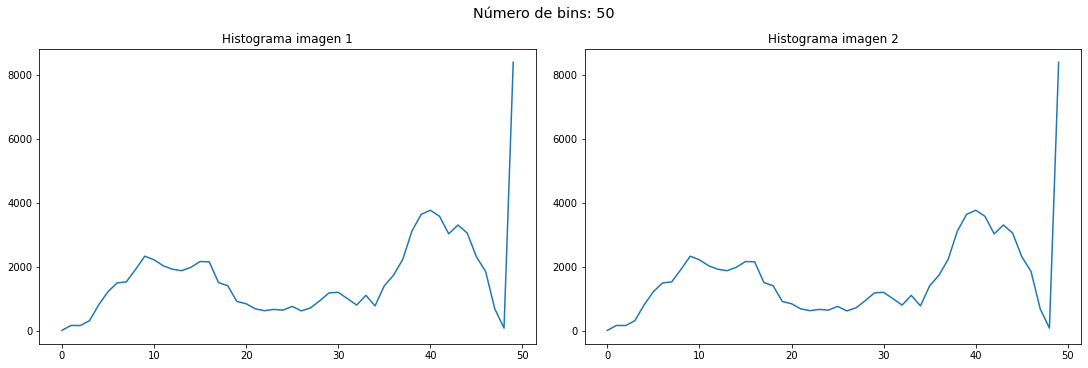

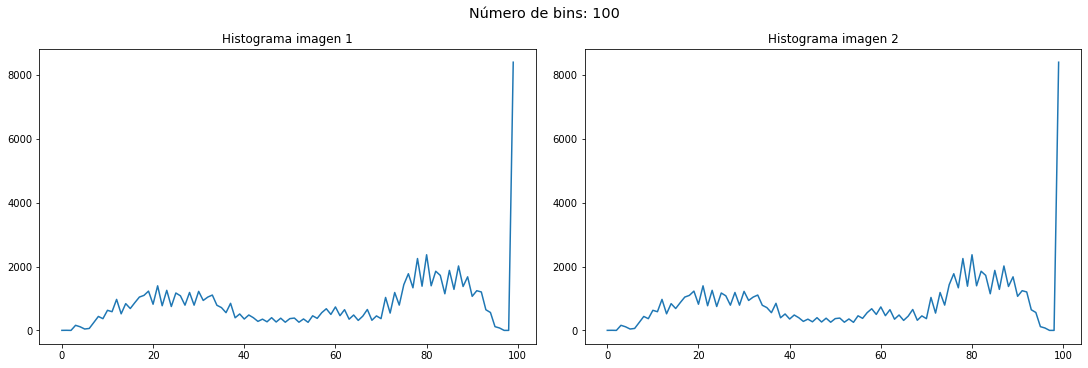

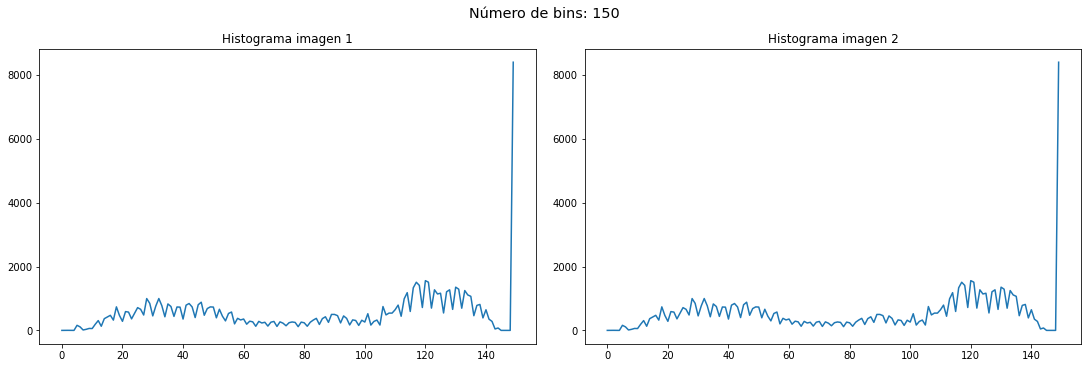

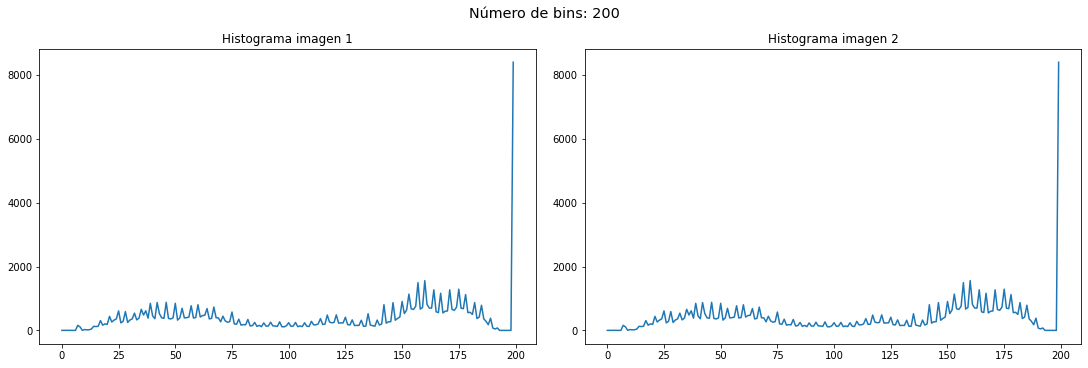

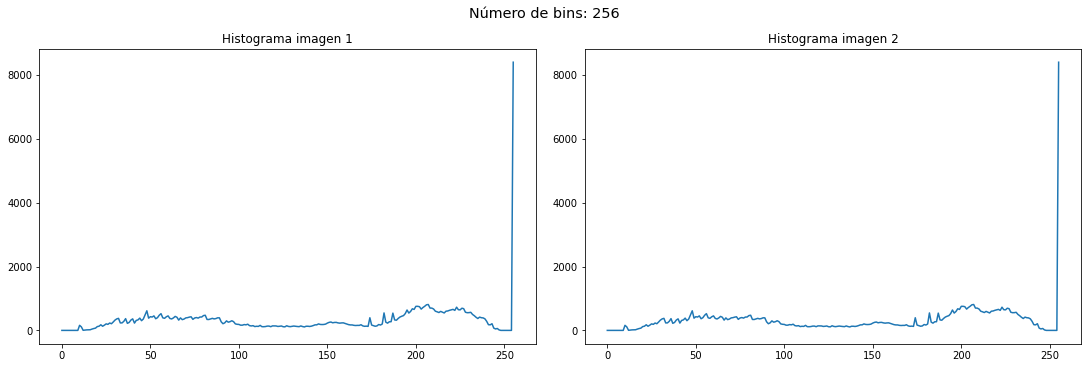

In [7]:
# Ploteo de histogramas
ploteo_histogramas_GS(img1, img2, 50)
ploteo_histogramas_GS(img1, img2, 100)
ploteo_histogramas_GS(img1, img2, 150)
ploteo_histogramas_GS(img1, img2, 200)
ploteo_histogramas_GS(img1, img2, 256)

## Conclusión: 

No sería útil emplear los histogramas como *features* para clasificar o reconocer imágenes ya que, en los casos evaluados, la información que brindan es idéntica. El análisis de los histogramas revela que la imagen `img1_tp.png` fue generada a partir de la imagen `img2_tp.png`, tomando el rango dinámico de esta última y redistribuyendo los colores de manera que coincidan las frecuencias de ocurrencia de cada valor.

---

# **Item 2**

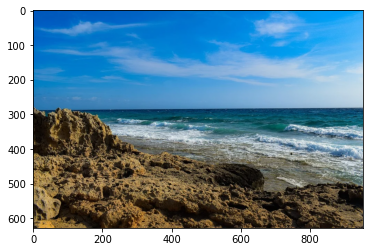

In [8]:
# Cargo imagen
img = cv.imread('segmentacion.png')

# Cambio a RGB
imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Muestro imagenes
plt.figure()
plt.imshow(imgRGB)
plt.show()

In [9]:
# Funcion para ploteo de histogramas RGB variando el numero de bins
def ploteo_histogramas_RGB(input_image, bins):

  im_r, im_g, im_b = cv.split(input_image)
  img1 = np.dstack((im_r, im_g, im_b))

  colors = ['r', 'g', 'b']
  labels = ['R', 'G', 'B']
  fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(8,5))
  title = "Número de bins: " + str(bins)
  st = fig.suptitle(title, fontsize="x-large")
  for i in range(3):
    hist, bins = np.histogram(img1[:, :, i].ravel(), bins, [0, 256])
    axs.plot(hist, color=colors[i], label=labels[i])

  axs.legend()  

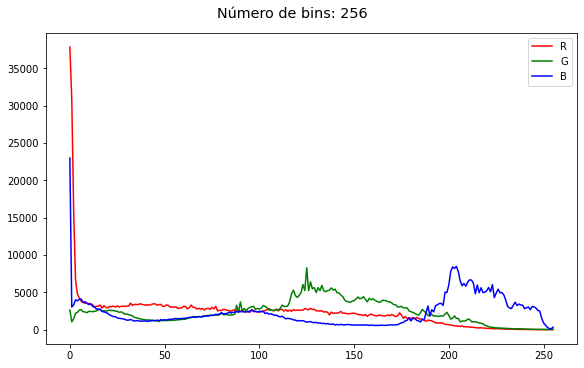

In [10]:
ploteo_histogramas_RGB(imgRGB, 256)

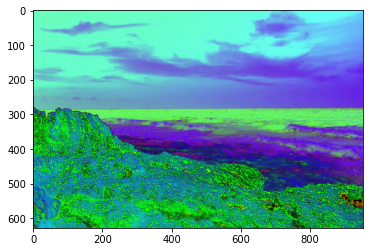

In [28]:
# Pasaje imagen a espacio HSV
img_HSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)
plt.figure(5)
plt.imshow(img_HSV)

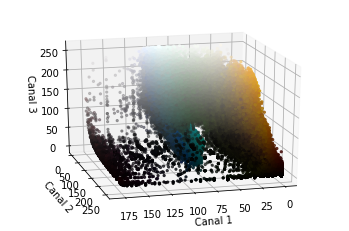

In [116]:
# Scatter plot de la distribucion de los colores en HSV
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

#c1, c2, c3 = cv.split(imgRGB)
c1, c2, c3 = cv.split(img_HSV)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.view_init(elev=20, azim=75)
axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")

plt.show()

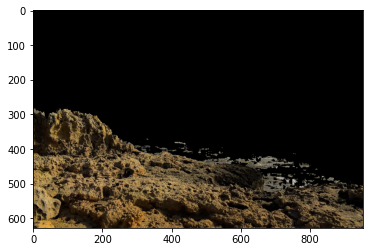

In [65]:
# Segmentación playa
color_l = (0, 0, 0) 
color_u = (25,255,255) 

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()


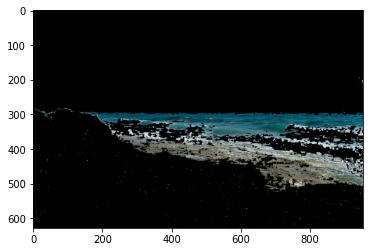

In [91]:
# Segmentación agua
color_l = (25,0,0)
color_u = (99,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()

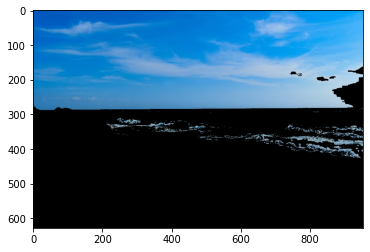

In [165]:
# Segmentacion cielo
color_l = (99,50,160)
color_u = (180,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()